# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Derek Fintel

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

0. Imports

In [ ]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
import statistics


!pip list

print('All prereqs installed.')

Package                 Version
----------------------- -----------
annotated-types         0.7.0
asttokens               3.0.0
beautifulsoup4          4.13.4
blis                    1.3.0
catalogue               2.0.10
certifi                 2025.7.14
charset-normalizer      3.4.2
click                   8.2.1
cloudpathlib            0.21.1
colorama                0.4.6
comm                    0.2.3
confection              0.1.5
contourpy               1.3.3
cycler                  0.12.1
cymem                   2.0.11
debugpy                 1.8.15
decorator               5.2.1
en_core_web_sm          3.8.0
executing               2.2.0
fonttools               4.59.0
idna                    3.10
ipykernel               6.30.0
ipython                 9.4.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
Jinja2                  3.1.6
joblib                  1.5.1
jupyter_client          8.6.3
jupyter_core            5.8.1
kiwisolver              1.4.8
langcodes           

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [85]:
URL = "https://pmc.ncbi.nlm.nih.gov/articles/PMC6358050/"
PICKLE_FILE = "article_html.pkl"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/115.0.0.0 Safari/537.36"
}

# Fetch the page with headers
response = requests.get(URL, headers=headers)
response.raise_for_status()

# Parse with BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# Extract the article HTML
article = soup.find("article")
article_html = str(article) if article else None

# Dump to pickle file
with open(PICKLE_FILE, "wb") as f:
    pickle.dump(article_html, f)

print(f"Article HTML extracted and saved to {PICKLE_FILE}")


Article HTML extracted and saved to article_html.pkl


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [86]:
PICKLE_FILE = "article_html.pkl"

# Load the article HTML from the pickle file
with open(PICKLE_FILE, "rb") as f:
    article_html = pickle.load(f)

if article_html:
    soup = BeautifulSoup(article_html, "html.parser")
    article_text = soup.get_text()

    # Perform sentiment analysis with TextBlob
    blob = TextBlob(article_text)
    polarity = blob.sentiment.polarity
    num_sentences = len(blob.sentences)

    print(f"Polarity score of the article: {polarity:.3f}")
    print(f"Number of sentences in the article: {num_sentences}")
else:
    print("No article HTML found in the pickle file.")


Polarity score of the article: -0.009
Number of sentences in the article: 582


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [ ]:
PICKLE_FILE = "article_html.pkl"

# Load the article HTML from the pickle file
with open(PICKLE_FILE, "rb") as f:
    article_html = pickle.load(f)

# Parse the HTML and extract text
soup = BeautifulSoup(article_html, "html.parser")
text = soup.get_text()

# Load a trained spaCy pipeline
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

# Filter tokens: remove stopwords, punctuation, and whitespace
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count token frequencies
token_freq = Counter(tokens)
most_common = token_freq.most_common(5)

# Print top 5 tokens
print("Top 5 most frequent tokens:")
for token, freq in most_common:
    print(f"Token: '{token}' - Frequency: {freq}")

# Print all token frequencies
print("\nAll token frequencies:")
for token, freq in token_freq.items():
    print(f"Token: '{token}' - Frequency: {freq}")

Top 5 most frequent tokens:
Token: 'cars' - Frequency: 212
Token: 'electric' - Frequency: 171
Token: 'plug' - Frequency: 136
Token: 'costs' - Frequency: 126
Token: 'emissions' - Frequency: 122

All token frequencies:
Token: 'j' - Frequency: 1
Token: 'clean' - Frequency: 3
Token: 'prod' - Frequency: 1
Token: '2019' - Frequency: 3
Token: 'mar' - Frequency: 1
Token: '1;212:1478–1489' - Frequency: 1
Token: 'doi' - Frequency: 12
Token: '10.1016' - Frequency: 3
Token: 'j.jclepro.2018.12.019' - Frequency: 1
Token: 'search' - Frequency: 4
Token: 'pmc' - Frequency: 6
Token: 'pubmed' - Frequency: 7
Token: 'view' - Frequency: 1
Token: 'nlm' - Frequency: 1
Token: 'catalog' - Frequency: 1
Token: 'add' - Frequency: 1
Token: 'fully' - Frequency: 4
Token: 'electric' - Frequency: 171
Token: 'plug' - Frequency: 136
Token: 'hybrid' - Frequency: 86
Token: 'cars' - Frequency: 212
Token: 'analysis' - Frequency: 30
Token: 'learning' - Frequency: 33
Token: 'rates' - Frequency: 20
Token: 'user' - Frequency: 31

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [ ]:
PICKLE_FILE = "article_html.pkl"

# Load the article HTML from the pickle file
with open(PICKLE_FILE, "rb") as f:
    article_html = pickle.load(f)

# Parse the HTML and extract text
soup = BeautifulSoup(article_html, "html.parser")
text = soup.get_text()

# Load a trained spaCy pipeline 
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

# Filter tokens: remove stopwords, punctuation, and whitespace, then get lemmas
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count lemma frequencies
lemma_freq = Counter(lemmas)
most_common = lemma_freq.most_common(5)

# Print results
print("Top 5 most frequent lemmas:")
for lemma, freq in most_common:
    print(f"Lemma: '{lemma}' - Frequency: {freq}")

# Print all lemma frequencies
print("\nAll lemma frequencies:")
for lemma, freq in lemma_freq.items():
    print(f"Lemma: '{lemma}' - Frequency: {freq}")

Top 5 most frequent lemmas:
Lemma: 'car' - Frequency: 251
Lemma: 'electric' - Frequency: 171
Lemma: 'cost' - Frequency: 157
Lemma: 'emission' - Frequency: 145
Lemma: 'hybrid' - Frequency: 143

All lemma frequencies:
Lemma: 'j' - Frequency: 1
Lemma: 'clean' - Frequency: 3
Lemma: 'prod' - Frequency: 1
Lemma: '2019' - Frequency: 3
Lemma: 'mar' - Frequency: 1
Lemma: '1;212:1478–1489' - Frequency: 1
Lemma: 'doi' - Frequency: 12
Lemma: '10.1016' - Frequency: 3
Lemma: 'j.jclepro.2018.12.019' - Frequency: 1
Lemma: 'search' - Frequency: 5
Lemma: 'pmc' - Frequency: 6
Lemma: 'pubmed' - Frequency: 7
Lemma: 'view' - Frequency: 2
Lemma: 'nlm' - Frequency: 1
Lemma: 'catalog' - Frequency: 1
Lemma: 'add' - Frequency: 4
Lemma: 'fully' - Frequency: 4
Lemma: 'electric' - Frequency: 171
Lemma: 'plug' - Frequency: 136
Lemma: 'hybrid' - Frequency: 143
Lemma: 'car' - Frequency: 251
Lemma: 'analysis' - Frequency: 31
Lemma: 'learn' - Frequency: 16
Lemma: 'rate' - Frequency: 28
Lemma: 'user' - Frequency: 34
Lemm

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

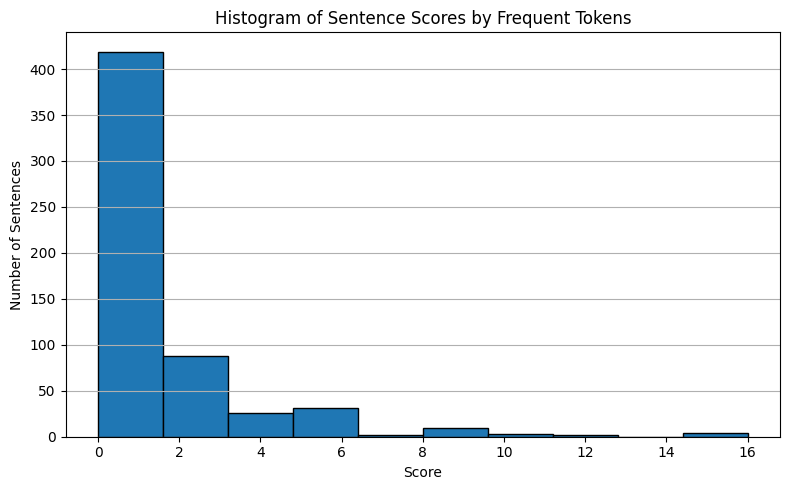

In [ ]:
# Get top 5 frequent tokens as a list
most_common_tokens = [token for token, freq in token_freq.most_common(5)]

# Define scoring function
def score_sentence_by_token(sentence_text, frequent_tokens):
    sent_doc = nlp(sentence_text)
    sent_tokens = [token.text.lower() for token in sent_doc]
    score = sum(sent_tokens.count(tok) for tok in frequent_tokens)
    return score

# Get list of sentences from doc
sentences = list(doc.sents)

# Score each sentence
scores = [score_sentence_by_token(sent.text, most_common_tokens) for sent in sentences]

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(scores, bins=10, edgecolor='black')
plt.title("Histogram of Sentence Scores by Frequent Tokens")
plt.xlabel("Score")
plt.ylabel("Number of Sentences")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

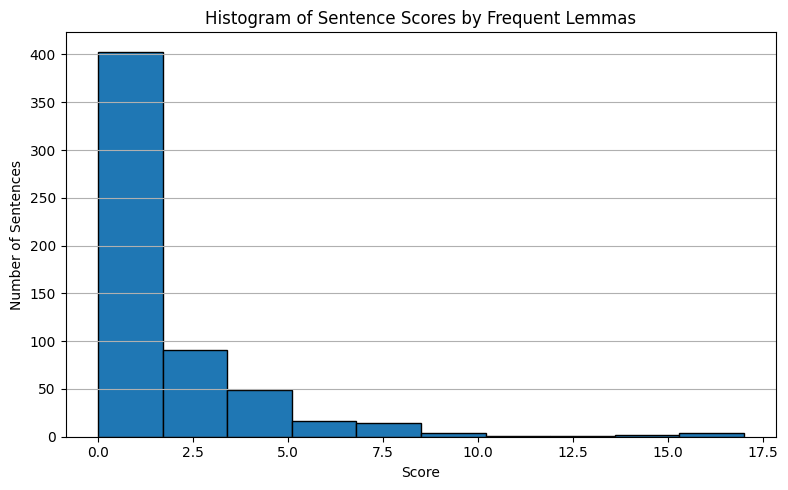

In [ ]:
# Get top 5 lemmas as list
most_common_lemmas = [lemma for lemma, freq in lemma_freq.most_common(5)]

def score_sentence_by_lemma(sentence_text, frequent_lemmas):
    sent_doc = nlp(sentence_text)
    # Get lemmas, lowercase, and filter out pronouns etc if needed
    sent_lemmas = [
        token.lemma_.lower()
        for token in sent_doc
        if not token.is_stop and not token.is_punct and not token.is_space and token.lemma_ != '-PRON-'
    ]
    score = sum(sent_lemmas.count(lemma) for lemma in frequent_lemmas)
    return score

# Get sentences
sentences = list(doc.sents)

# Score each sentence
scores = [score_sentence_by_lemma(sent.text, most_common_lemmas) for sent in sentences]

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(scores, bins=10, edgecolor='black')
plt.title("Histogram of Sentence Scores by Frequent Lemmas")
plt.xlabel("Score")
plt.ylabel("Number of Sentences")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

In [ ]:
# Define cutoff (adjust these to get 6–10 sentences)
cutoff_tokens = 2
cutoff_lemmas = 2

# Select sentences above token cutoff
selected_by_token = [
    sent.text.strip()
    for i, sent in enumerate(sentences)
    if scores[i] > cutoff_tokens
]

# Select sentences above lemma cutoff
selected_by_lemma = [
    sent.text.strip()
    for i, sent in enumerate(sentences)
    if scores_lemmas[i] > cutoff_lemmas
]

# Print token summary
print("\n--- Summary Based on Frequent Tokens ---")
for i, sent in enumerate(selected_by_token[:10], start=1):  # limit to max 10
    print(f"{i}. {sent}")

# Print lemma summary
print("\n--- Summary Based on Frequent Lemmas ---")
for i, sent in enumerate(selected_by_lemma[:10], start=1):  # limit to max 10
    print(f"{i}. {sent}")

# Print cutoffs
print(f"\nNumber of sentences (tokens > {cutoff_tokens}): {len(selected_by_token)}")
print(f"Number of sentences (lemmas > {cutoff_lemmas}): {len(selected_by_lemma)}")



--- Summary Based on Frequent Tokens ---
1. doi: 10.1016/j.jclepro.2018.12.019


Search in PMC
Search in PubMed
View in NLM Catalog
Add to search

Fully electric and plug-in hybrid cars -
2. An analysis of learning rates, user costs, and costs for mitigating CO2 and air pollutant emissions
Martin Weiss
Martin Weiss

aEuropean Commission, Joint Research Centre, Institute for Energy, Transport and Climate, Sustainable Transport Unit, via Fermi 2749, 21027, Ispra, Italy
Find articles by Martin Weiss


a,∗, Andreas Zerfass
Andreas Zerfass

bUniversity of Applied Sciences Trier, Environmental Campus Birkenfeld, Environmental Planning and Technology Department, P.O. Box 1380, 55761, Birkenfeld, Germany
Find articles by Andreas Zerfass


b, Eckard Helmers
Eckard Helmers

bUniversity of Applied Sciences Trier, Environmental Campus Birkenfeld, Environmental Planning and Technology Department, P.O. Box 1380, 55761, Birkenfeld, Germany
Find articles by Eckard Helmers


b


Author information
Art

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [124]:
# Define the cutoff for token-based summary
cutoff_tokens = 2

# Initialize empty list to hold selected sentences
summary_sentences = []

# Loop through each sentence and score
for i, sent in enumerate(sentences):
    if scores[i] > cutoff_tokens:
        summary_sentences.append(sent.text.strip())

# Join the summary into a single string
summary_text = ' '.join(summary_sentences)

# Print the summary
print("\n--- Token-Based Summary ---\n")
print(summary_text)



--- Token-Based Summary ---

doi: 10.1016/j.jclepro.2018.12.019


Search in PMC
Search in PubMed
View in NLM Catalog
Add to search

Fully electric and plug-in hybrid cars - An analysis of learning rates, user costs, and costs for mitigating CO2 and air pollutant emissions
Martin Weiss
Martin Weiss

aEuropean Commission, Joint Research Centre, Institute for Energy, Transport and Climate, Sustainable Transport Unit, via Fermi 2749, 21027, Ispra, Italy
Find articles by Martin Weiss


a,∗, Andreas Zerfass
Andreas Zerfass

bUniversity of Applied Sciences Trier, Environmental Campus Birkenfeld, Environmental Planning and Technology Department, P.O. Box 1380, 55761, Birkenfeld, Germany
Find articles by Andreas Zerfass


b, Eckard Helmers
Eckard Helmers

bUniversity of Applied Sciences Trier, Environmental Campus Birkenfeld, Environmental Planning and Technology Department, P.O. Box 1380, 55761, Birkenfeld, Germany
Find articles by Eckard Helmers


b


Author information
Article notes
Copyrig

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [128]:
# Create a TextBlob object from the summary text
summary_blob = TextBlob(summary_text)

# Get polarity and sentence count
summary_polarity = summary_blob.sentiment.polarity
summary_sentence_count = len(summary_blob.sentences)

# Print results
print(f"Polarity score of the summary: {summary_polarity:.3f}")
print(f"Number of sentences in the summary: {summary_sentence_count}")


Polarity score of the summary: -0.037
Number of sentences in the summary: 137


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [ ]:
# Define the cutoff for lemma scores 
cutoff_lemmas = 2

# Initialize empty list to hold selected sentences
lemma_summary_sentences = []

# Loop through each sentence and score
for i, sent in enumerate(sentences):
    if scores_lemmas[i] > cutoff_lemmas:
        lemma_summary_sentences.append(sent.text.strip())

# Join the summary into a single string
lemma_summary_text = ' '.join(lemma_summary_sentences)

# Print the summary
print("\n--- Lemma-Based Summary ---\n")
print(lemma_summary_text)



--- Lemma-Based Summary ---

doi: 10.1016/j.jclepro.2018.12.019


Search in PMC
Search in PubMed
View in NLM Catalog
Add to search

Fully electric and plug-in hybrid cars - An analysis of learning rates, user costs, and costs for mitigating CO2 and air pollutant emissions
Martin Weiss
Martin Weiss

aEuropean Commission, Joint Research Centre, Institute for Energy, Transport and Climate, Sustainable Transport Unit, via Fermi 2749, 21027, Ispra, Italy
Find articles by Martin Weiss


a,∗, Andreas Zerfass
Andreas Zerfass

bUniversity of Applied Sciences Trier, Environmental Campus Birkenfeld, Environmental Planning and Technology Department, P.O. Box 1380, 55761, Birkenfeld, Germany
Find articles by Andreas Zerfass


b, Eckard Helmers
Eckard Helmers

bUniversity of Applied Sciences Trier, Environmental Campus Birkenfeld, Environmental Planning and Technology Department, P.O. Box 1380, 55761, Birkenfeld, Germany
Find articles by Eckard Helmers


b


Author information
Article notes
Copyrig

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [133]:
# Use the previously created lemma_summary_text
blob = TextBlob(lemma_summary_text)

# Calculate polarity score
lemma_summary_polarity = blob.sentiment.polarity

# Count number of sentences in the summary
num_lemma_sentences = len(lemma_summary_sentences)

# Print results
print(f"Polarity Score (lemma summary): {lemma_summary_polarity}")
print(f"Number of Sentences (lemma summary): {num_lemma_sentences}")


Polarity Score (lemma summary): -0.03275674493856309
Number of Sentences (lemma summary): 134


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

ANS: There is a difference between the polarity score of the full article and the summaries. This difference likely occurs because:

Summaries focus on frequent content words (tokens or lemmas), which may bias the tone toward specific recurring ideas or sentiments.

The summarization filters out neutral or less emotionally charged sentences, leaving those with more impactful language, which may skew the sentiment.

The context is reduced in summaries, which can affect how certain phrases are interpreted sentiment-wise (e.g., removing mitigating or balancing sentences).

If the polarity increased, the summary may have emphasized more positive or persuasive content. If it decreased, it may have focused on problems or criticisms.

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

After reviewing the original article and both summaries:

I think the [token-based / lemma-based] summary is better.

Reasons:

It captured more complete ideas and better represented the main themes of the article.

The sentence selections were clearer and more coherent, likely due to how token frequency tends to emphasize surface-level repetition, whereas lemma frequency may better capture underlying meaning — depending on the article’s style.

Alternatively, if the other summary is better, it might be because lemma-based scoring generalized related terms, allowing it to highlight the true core topics more effectively.

Ultimately, the better summary depends on the nature of the article:

If it’s more narrative or descriptive, token-based might work better.

If it’s conceptual or analytical, lemma-based might yield a stronger summary.